# How Jupyter Notebook works
In the following video, it is explained what jupyter notebook is and how it works, along with some neat tricks for your start:

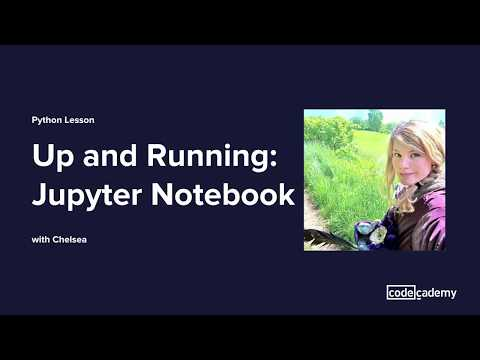

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo('oJ6z02N0Te0', width=600, height=337)

# Magic commands:
Shortcuts and advanced tips: Advanced NB

Magic commands are run by having % at the start of a cell. Here are some useful ones I use often:

%time - Times execution of a cell.
%who - Print all interactive variables. %whos will list additional info on the variables.
%load hello_world.py - Loads in the contents of a file into a cell.
%store data - Stores data to be used by other Notebooks. %store -r data in a different Notebook will bring in that data to be used.
%lsmagic - List out all the magic commands.
To learn about any magic command, run the magic command with a ? at the end. For instance %time?.

You can also run bash commands by having ! before a bash command. For instance !ls.

In [37]:
%%latex
$y=mx+b$

<IPython.core.display.Latex object>

In [38]:
%time
some_data = [1,2,3]
print(some_data)

Wall time: 0 ns
[1, 2, 3]


In [39]:
# load dependencies
import numpy as np
import numpy.random as rnd

data_x = np.array([1,2,3])
data_y = rnd.random(3)

In [40]:
%time
import pandas as pd
df = pd.read_csv('./data/exams.csv')
df

Wall time: 0 ns


,id,date,class,student_id,grade,credits
0,0,2016-01-01,E1,1234,1.0,4
1,1,2016-01-05,E2,1234,2.0,2
2,2,2016-02-01,E3,1234,5.0,6
3,3,2016-02-16,E3,1234,4.0,6
4,4,2016-01-01,E1,4321,2.3,4
5,5,2016-01-05,E2,4321,2.0,2


In [41]:
df.dtypes

id              int64
date           object
class          object
student_id      int64
grade         float64
 credits        int64
dtype: object

In [42]:
df.head(3)

,id,date,class,student_id,grade,credits
0,0,2016-01-01,E1,1234,1.0,4
1,1,2016-01-05,E2,1234,2.0,2
2,2,2016-02-01,E3,1234,5.0,6


In [43]:
df.tail(3)

,id,date,class,student_id,grade,credits
3,3,2016-02-16,E3,1234,4.0,6
4,4,2016-01-01,E1,4321,2.3,4
5,5,2016-01-05,E2,4321,2.0,2


In [44]:
df.describe()

,id,student_id,grade,credits
count,6.000000,6.000000,6.000000,6.000000
mean,2.500000,2263.000000,2.716667,4.000000
std,1.870829,1594.119945,1.483801,1.788854
min,0.000000,1234.000000,1.000000,2.000000
25%,1.250000,1234.000000,2.000000,2.500000
50%,2.500000,1234.000000,2.150000,4.000000
75%,3.750000,3549.250000,3.575000,5.500000
max,5.000000,4321.000000,5.000000,6.000000


In [45]:
df.shape

(6, 6)

In [46]:
#A DataFrame always has an index for each row. The index is initially just an enumeration added at creation but can be set explicitly.

df = df.set_index('id')

In [47]:
df

,date,class,student_id,grade,credits
id,,,,,
0,2016-01-01,E1,1234,1.0,4
1,2016-01-05,E2,1234,2.0,2
2,2016-02-01,E3,1234,5.0,6
3,2016-02-16,E3,1234,4.0,6
4,2016-01-01,E1,4321,2.3,4
5,2016-01-05,E2,4321,2.0,2


In [48]:
df.date

id
0    2016-01-01
1    2016-01-05
2    2016-02-01
3    2016-02-16
4    2016-01-01
5    2016-01-05
Name: date, dtype: object

In [49]:
df.loc[4,'grade']    # row 4 grade column

2.3

In [50]:
df.iloc[4]  # row 4

date          2016-01-01
class                 E1
student_id          4321
grade                2.3
 credits               4
Name: 4, dtype: object

In [51]:
df.iloc[4,3]   # row=4, column = 3

2.3

In [52]:
df['grade'] > 3.0

id
0    False
1    False
2     True
3     True
4    False
5    False
Name: grade, dtype: bool

In [53]:
df[df['grade'] > 3.0]

,date,class,student_id,grade,credits
id,,,,,
2,2016-02-01,E3,1234,5.0,6
3,2016-02-16,E3,1234,4.0,6


In [54]:
# Analysis in pandas
df.mean()

C:\dev\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


student_id    2263.000000
grade            2.716667
 credits         4.000000
dtype: float64

In [55]:
df.groupby('class')

In [56]:
df.groupby('class').size()

class
E1    2
E2    2
E3    2
dtype: int64

In [57]:
df.groupby('class').grade.mean()

class
E1    1.65
E2    2.00
E3    4.50
Name: grade, dtype: float64

# Data Visulaization with Bokeh

In [58]:
# In Bokeh you first create a figure, add glyphs to it and then show the plot. 
# Plots are created in a new browser tab by default, but can be rendered within the notebook by calling output_notebook() once.
# Bokeh plots are inherently interactive, try it out with panning or zooming!

In [60]:
from bokeh.plotting import output_notebook, figure, show
output_notebook()

# create a figure
p = figure(x_axis_label='grade', y_axis_label='credits', plot_width=270, plot_height=250)

# Add scatter points
p.circle(source=df, x='grade', y=' credits')

show(p)

Loading BokehJS ...

In [61]:
# styling options

In [67]:
from bokeh.models import CategoricalColorMapper
from bokeh.palettes import RdBu3           # range of colors

# convert student_id to string to be able to use categorical color mapper
df['student_id'] = df['student_id'].astype(str)

# create mapper from student_id to color
color_mapper = CategoricalColorMapper(factors = sorted(df.student_id.unique()),
                                      palette = [RdBu3[2], RdBu3[0]])

# define tooltip , when you hover on data you get additional information
tooltip = [("student", "@student_id"),
           ("class", "@class"),
           ("date", "@date")]

# create a new plot with a title and tooltips

# tools = Tools the plot should start with. (default: ‘pan,wheel_zoom,box_zoom,save,reset,help’)

p = figure(title = "student performance" ,x_axis_label='grade', y_axis_label='credits', plot_width=270, plot_height=250,
          tools=["wheel_zoom,pan,hover"], tooltips=tooltip)

# add colormapped scatter points
p.circle(source=df, x='grade', y=' credits', legend_field="student_id",
         color={'field': 'student_id', 'transform': color_mapper}, 
         fill_alpha=0.8, size=10)

# change plot styling
p.legend.location = 'bottom_right'         # for legend

show(p)
